In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import learning_curve
from sklearn import metrics

In [2]:
airFoil = pd.read_table("/home/zak/Documents/Uni/Y3/Machine Learning/Project/ML-Assignment1/airfoil_self_noise.dat", sep="\s+", names=["Frequency", "AngleOfAttack", "Chord", "Velocity", "SSDT", "SoundPressure"])

In [3]:
airFoil.head()

,Frequency,AngleOfAttack,Chord,Velocity,SSDT,SoundPressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
airFoil.shape

(1503, 6)

In [5]:
airFoil.dtypes

Frequency          int64
AngleOfAttack    float64
Chord            float64
Velocity         float64
SSDT             float64
SoundPressure    float64
dtype: object

In [6]:
airFoil.isnull().sum()

Frequency        0
AngleOfAttack    0
Chord            0
Velocity         0
SSDT             0
SoundPressure    0
dtype: int64

## Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

## Attribute Information:

<li> Frequency, in Hertzs.
<li> Angle of attack, in degrees.
<li> Chord length, in meters.
<li> Free-stream velocity, in meters per second.
<li> Suction side displacement thickness, in meter
<li> Scaled sound pressure level, in decibels. 

## Using IQR Method

In [7]:
Q1 = airFoil.quantile(0.25)
Q3 = airFoil.quantile(0.75)

IQR = Q3 = Q1
print(IQR)

Frequency        800.000000
AngleOfAttack      2.000000
Chord              0.050800
Velocity          39.600000
SSDT               0.002535
SoundPressure    120.191000
Name: 0.25, dtype: float64


In [8]:
airFoil_out = airFoil[~((airFoil <(Q1 - 1.5 * IQR)) | (airFoil > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
print(airFoil_out.shape)

(97, 6)


In [10]:
print(airFoil_out)

      Frequency  AngleOfAttack   Chord  Velocity      SSDT  SoundPressure
725         800            0.0  0.0508      71.3  0.000740        130.960
726        1000            0.0  0.0508      71.3  0.000740        129.450
727        1250            0.0  0.0508      71.3  0.000740        128.560
728        1600            0.0  0.0508      71.3  0.000740        129.680
729        2000            0.0  0.0508      71.3  0.000740        131.060
...         ...            ...     ...       ...       ...            ...
1333        800            3.3  0.1016      31.7  0.002514        131.362
1334       1000            3.3  0.1016      31.7  0.002514        133.012
1335       1250            3.3  0.1016      31.7  0.002514        134.022
1336       1600            3.3  0.1016      31.7  0.002514        133.402
1337       2000            3.3  0.1016      31.7  0.002514        131.642

[97 rows x 6 columns]


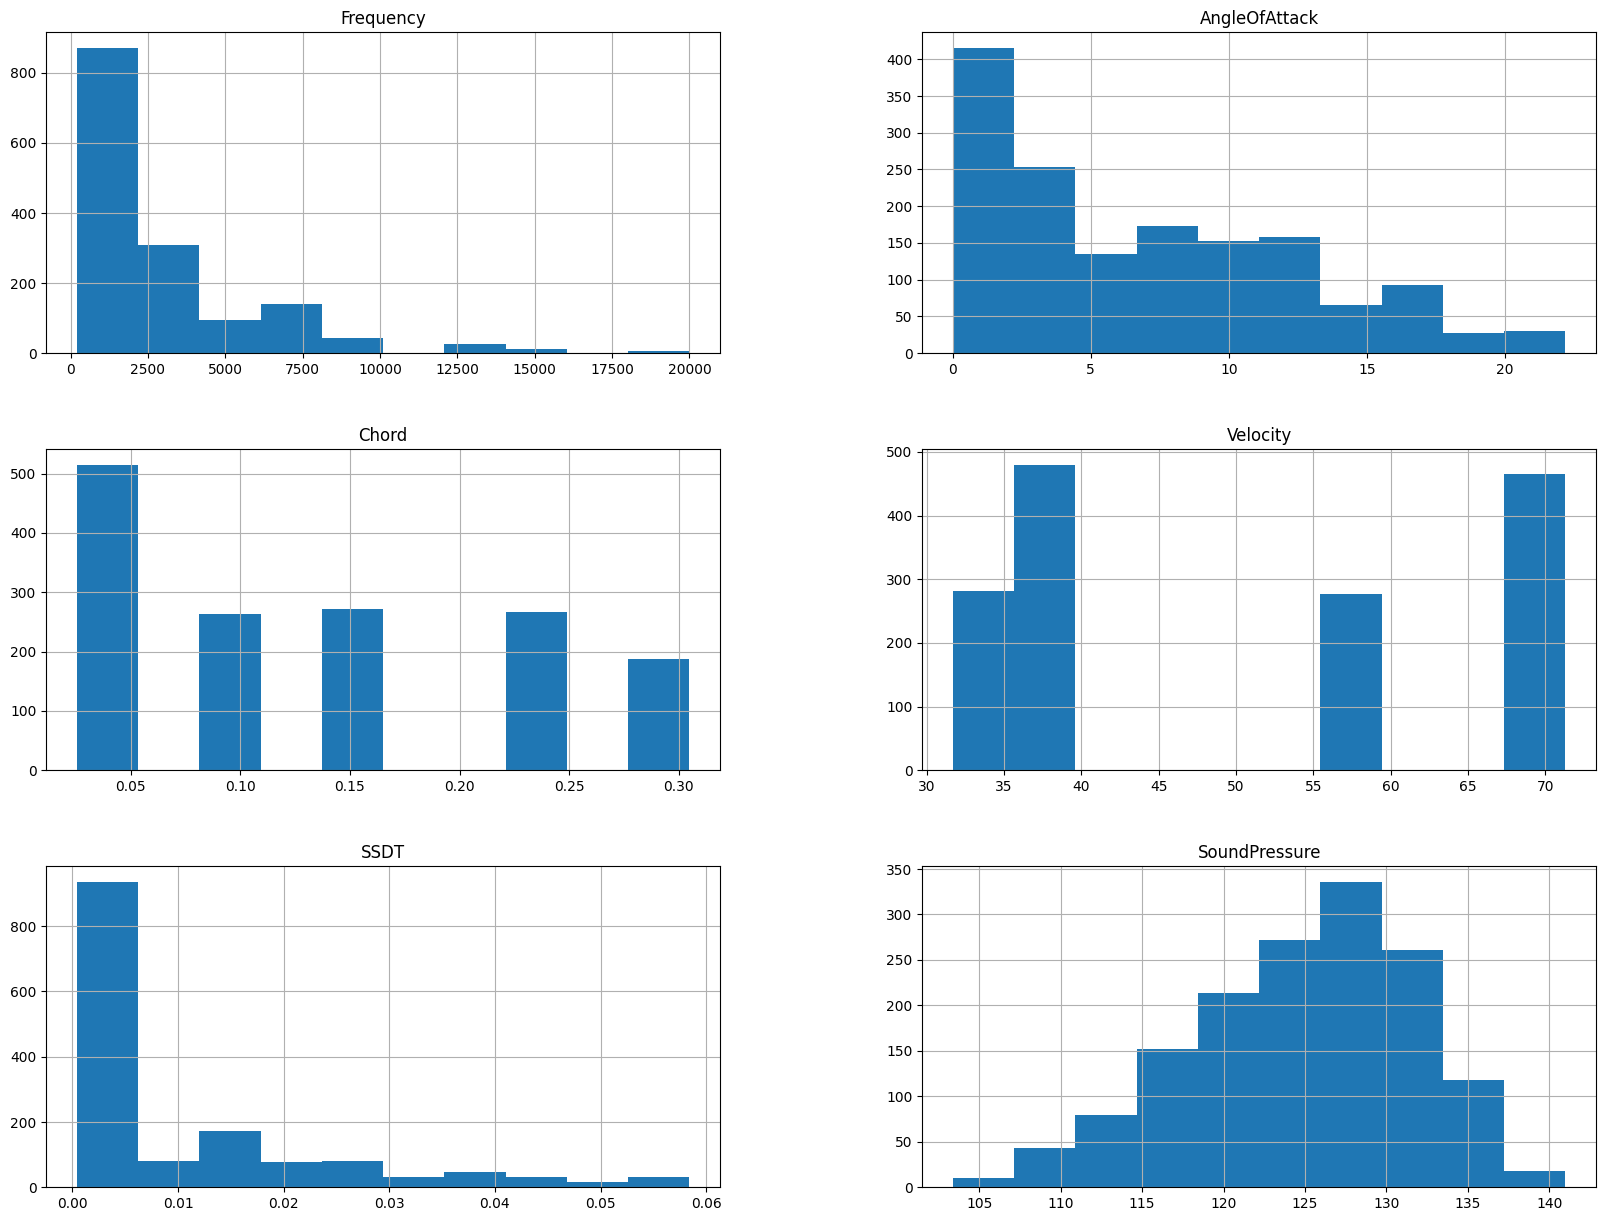

In [11]:
airFoil.hist(figsize=(20, 15))
plt.show()

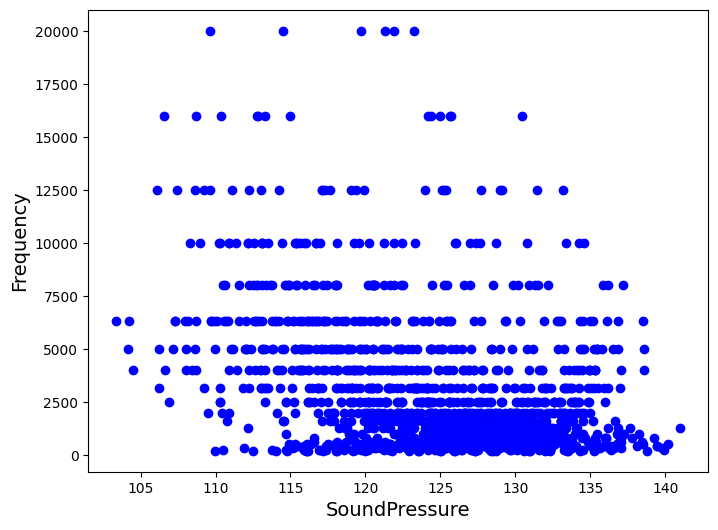

In [12]:
fig = plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(pd.DataFrame(airFoil.SoundPressure), pd.DataFrame(airFoil.Frequency),c="blue")
plt.xlabel('SoundPressure',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

## Splitting the data

In [13]:
X = airFoil.drop(['SoundPressure'], axis=1)
Y = airFoil.drop(['Frequency', 'AngleOfAttack', 'Chord', 'Velocity', 'SSDT'], axis =1)

In [14]:
X.head()

,Frequency,AngleOfAttack,Chord,Velocity,SSDT
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [15]:
Y.head()

,SoundPressure
0,126.201
1,125.201
2,125.951
3,127.591
4,127.461


## Train test splitting the data.

## Linear Regression

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [17]:
linearReg=LinearRegression()
linearReg.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred=linearReg.predict(x_test)
y_pred

array([[126.46274574],
       [120.47595194],
       [117.75855607],
       [129.1302893 ],
       [124.78612694],
       [129.17418953],
       [120.2561083 ],
       [133.30641759],
       [119.37807655],
       [126.10083781],
       [125.0349905 ],
       [126.96955201],
       [132.49347482],
       [121.02713693],
       [123.7448257 ],
       [119.04999283],
       [128.7846024 ],
       [123.20317239],
       [117.92428406],
       [125.07955073],
       [122.22646665],
       [127.36695301],
       [127.37487951],
       [126.08211442],
       [128.98413633],
       [122.65895214],
       [116.79252578],
       [126.84533737],
       [128.08454543],
       [126.14137454],
       [129.75388362],
       [124.11755832],
       [109.262863  ],
       [127.61480252],
       [127.91164858],
       [129.77440024],
       [119.9497899 ],
       [104.15794221],
       [126.89911793],
       [129.72858658],
       [131.99044372],
       [122.86400594],
       [124.94767529],
       [118

In [19]:
print("RMSE: ", 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

RMSE:  3.753068927691066


In [20]:
Accuracy=r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)

Accuracy of the model is 52.37


Text(0, 0.5, 'Predicted')

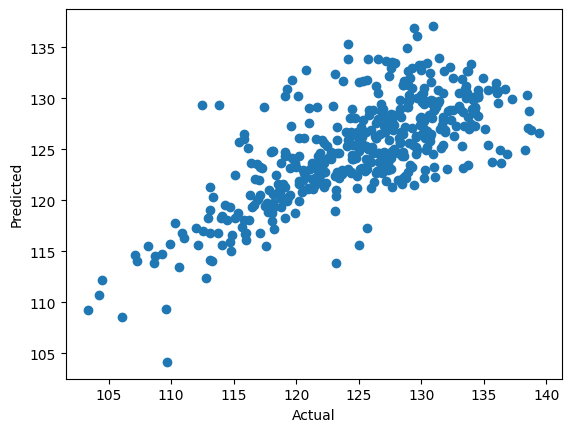

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='SoundPressure'>

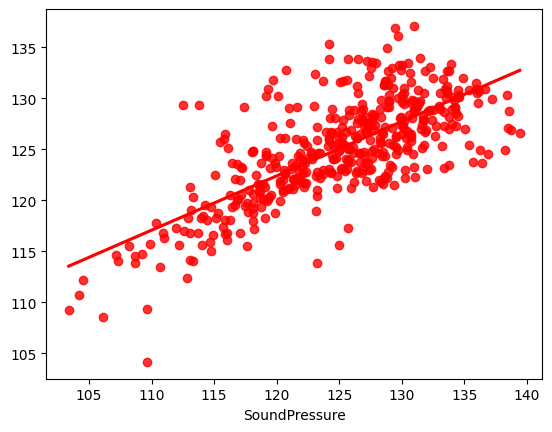

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

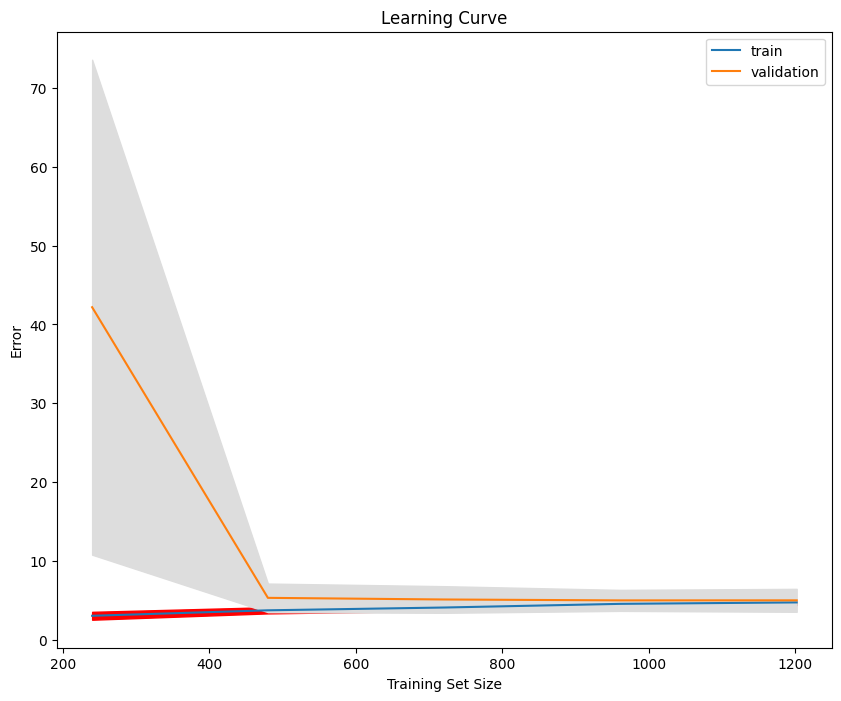

In [23]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=linearReg,
    X=X,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

## KNN

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [25]:
k_range = range(1, 10)

for K in k_range:
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("RMSE: ", 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
    Accuracy=r2_score(y_test, y_pred)*100
    print("Accuracy for k = ", K, "is: ", Accuracy)

RMSE:  2.2853767080477128
Accuracy for k =  1 is:  82.43429518757748
RMSE:  2.010213691333198
Accuracy for k =  2 is:  86.51143655320152
RMSE:  2.4049350533775997
Accuracy for k =  3 is:  80.74893776438998
RMSE:  2.659625114860034
Accuracy for k =  4 is:  76.35708365619031
RMSE:  2.90805357472305
Accuracy for k =  5 is:  71.79204211375253
RMSE:  3.0781321711660237
Accuracy for k =  6 is:  68.37327364766213
RMSE:  3.234989884086921
Accuracy for k =  7 is:  65.06772712018751
RMSE:  3.2945690530307465
Accuracy for k =  8 is:  63.85833021111197
RMSE:  3.3906197862351335
Accuracy for k =  9 is:  61.83479912384533


<b> K = 2 has the best accuracy</b>

In [26]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
Accuracy=r2_score(y_test, y_pred)*100
print("RMSE: ", 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("Accuracy for k = ", K, "is: ", Accuracy)

RMSE:  2.010213691333198
Accuracy for k =  9 is:  86.51143655320152


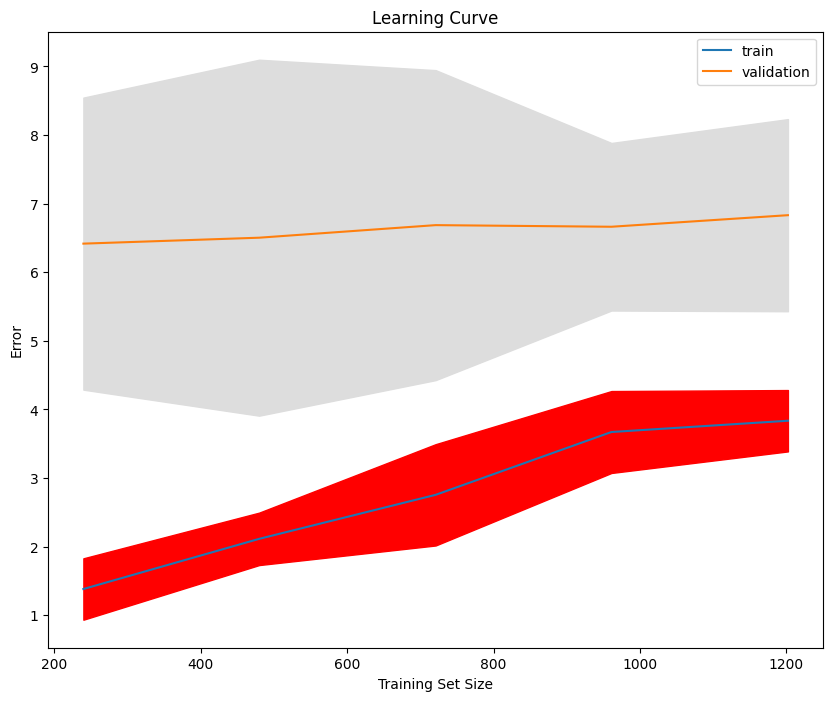

In [27]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

#### KNN RMSE is lower than the RMSE of the Linear Regression.

## Feature Selection Techniques

### Using Variance based Threshold technique

In [28]:
vt = VarianceThreshold(threshold=10)
vt.fit(X)
pd.DataFrame({'variance': vt.variances_,
              'select_feature': vt.get_support()},
            index=X.columns).T

,Frequency,AngleOfAttack,Chord,Velocity,SSDT
variance,9932104.797281,35.000938,0.008744,242.350262,0.000173
select_feature,True,True,False,True,False


#### Dropping the high variance feature

In [29]:
X_new = X.drop(['Frequency'], axis = 1)

In [30]:
vt.fit(X_new)
pd.DataFrame({'variance': vt.variances_,
              'select_feature': vt.get_support()},
            index=X_new.columns).T

,AngleOfAttack,Chord,Velocity,SSDT
variance,35.000938,0.008744,242.350262,0.000173
select_feature,True,False,True,False


In [31]:
X_subset = X_new.iloc[:,vt.get_support()]
X_subset

,AngleOfAttack,Velocity
0,0.0,71.3
1,0.0,71.3
2,0.0,71.3
3,0.0,71.3
4,0.0,71.3
...,...,...
1498,15.6,39.6
1499,15.6,39.6
1500,15.6,39.6
1501,15.6,39.6


#### Splitting training and testing data

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X_subset,Y,test_size=0.3,random_state=0)

### Linear Regression after the feature selection

In [33]:
linearReg=LinearRegression()
linearReg.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred=linearReg.predict(x_test)
y_pred

array([[127.15891475],
       [127.15891475],
       [122.72816095],
       [124.07421178],
       [124.42877534],
       [126.2611125 ],
       [125.72926716],
       [125.35762797],
       [123.15363722],
       [124.90872684],
       [125.00306441],
       [126.3079622 ],
       [124.90872684],
       [124.06347097],
       [125.0917053 ],
       [124.96695551],
       [126.44978763],
       [125.35762797],
       [122.5920322 ],
       [121.82402388],
       [123.53097309],
       [123.22454994],
       [123.67345106],
       [123.22325924],
       [124.90743614],
       [124.19959973],
       [126.2611125 ],
       [125.86475776],
       [124.87896716],
       [123.95140523],
       [124.32369697],
       [127.15891475],
       [123.12387754],
       [124.07421178],
       [126.21932131],
       [123.67345106],
       [126.2611125 ],
       [126.44978763],
       [123.95140523],
       [123.22454994],
       [126.2611125 ],
       [124.08054661],
       [122.272925  ],
       [123

In [35]:
print("RMSE: ", 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

RMSE:  5.391435486429861


In [36]:
Accuracy=r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)

Accuracy of the model is 5.11


Text(0, 0.5, 'Predicted')

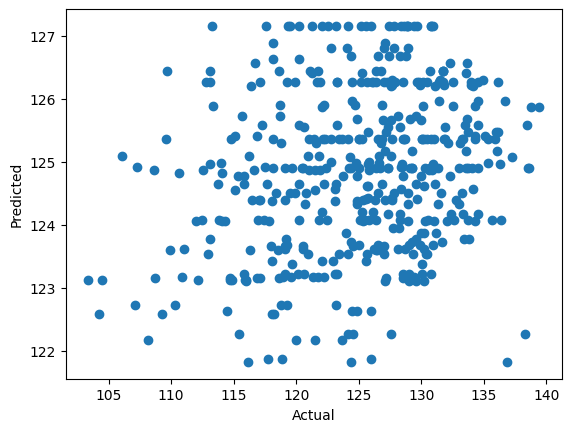

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='SoundPressure'>

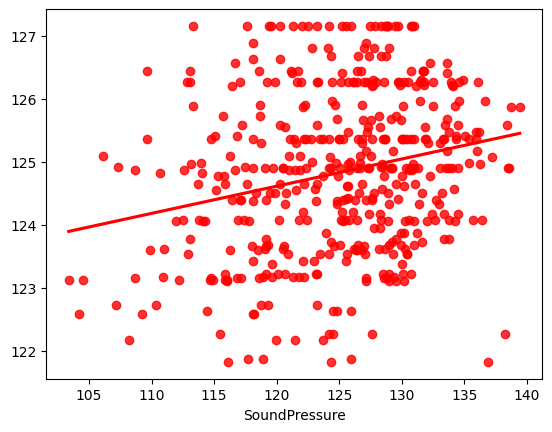

In [38]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

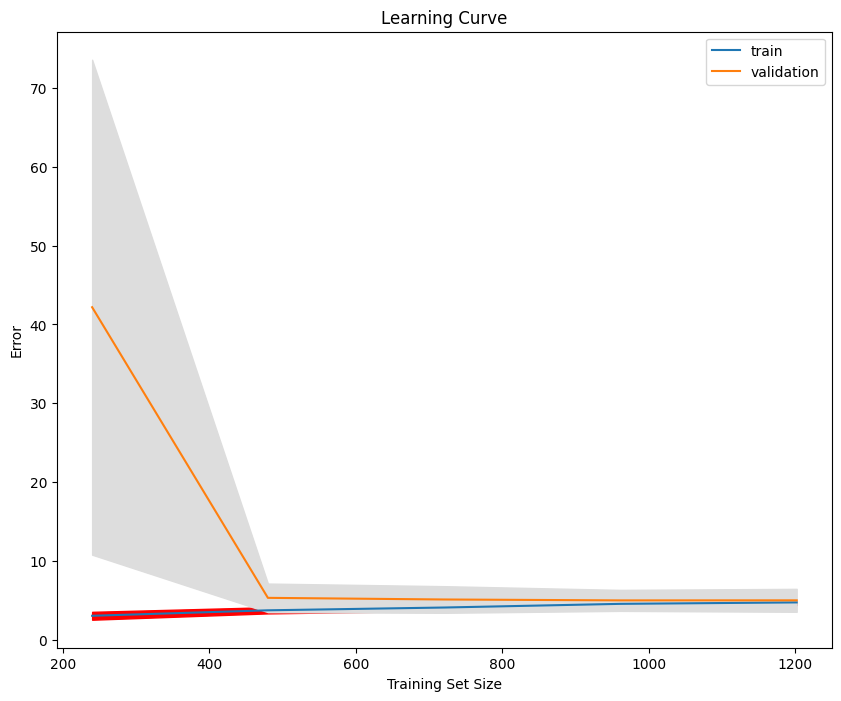

In [39]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=linearReg,
    X=X,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

### KNN After the feature selection

## KNN

In [40]:
k_range = range(1, 10)

for K in k_range:
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("RMSE: ", 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
    Accuracy=r2_score(y_test, y_pred)*100
    print("Accuracy for k = ", K, "is: ", Accuracy)

RMSE:  7.55539217551114
Accuracy for k =  1 is:  -86.85033798773777
RMSE:  6.147269309173037
Accuracy for k =  2 is:  -24.77516484552107
RMSE:  5.633113867807037
Accuracy for k =  3 is:  -4.542056619173196
RMSE:  5.446919472999018
Accuracy for k =  4 is:  2.3597147476412728
RMSE:  5.425475931626191
Accuracy for k =  5 is:  2.9486580192670586
RMSE:  5.392311639046753
Accuracy for k =  6 is:  4.144626500702941
RMSE:  5.311643785810709
Accuracy for k =  7 is:  6.763596356106172
RMSE:  5.233502061374867
Accuracy for k =  8 is:  9.471059250424208
RMSE:  5.240712503046271
Accuracy for k =  9 is:  9.264156831893755


<b>Best K in K = 8

In [41]:
knn = neighbors.KNeighborsRegressor(n_neighbors = K)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
Accuracy=r2_score(y_test, y_pred)*100
print("RMSE: ", 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("Accuracy for k = ", K, "is: ", Accuracy)

RMSE:  5.240712503046271
Accuracy for k =  9 is:  9.264156831893755


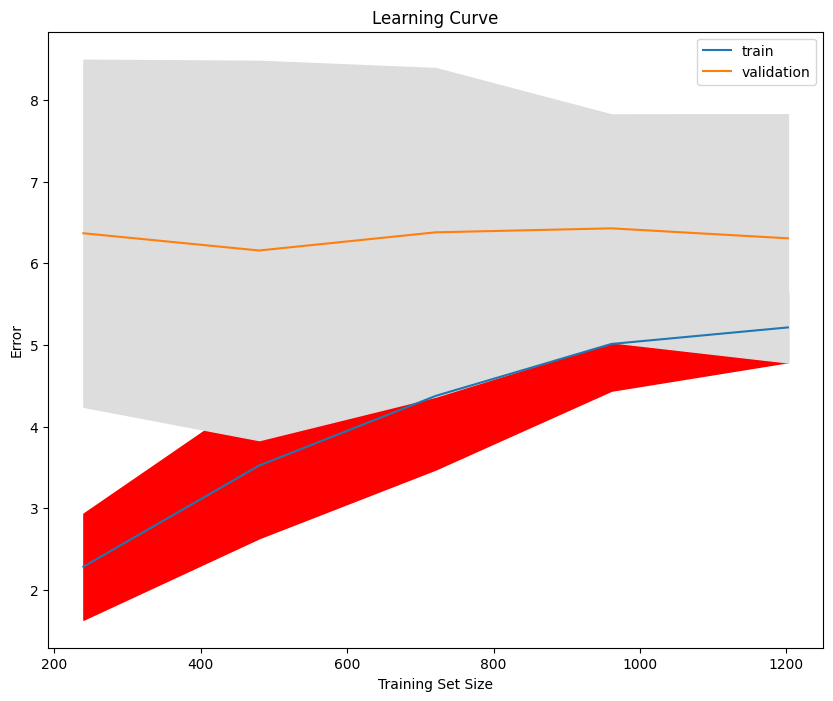

In [42]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X,
    y=Y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

# Conclusion
## Both models did not improve after the feature selection
## While the KNN had lower error rate than the Linear regression in both, KNN without the feature selection was the best model.